<b>Train

In [1]:
import numpy  as np
import pandas as pd
from orion import Orion

/home/fermat/anaconda3/envs/orion/lib/python3.7/site-packages/sklearn/utils/validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'


In [2]:
np.random.seed(0)

In [3]:
custom_data = pd.DataFrame({"timestamp": np.arange(0, 150000, 300),
                                "value": np.random.randint(0, 10, 500)})

input anomalies data

In [4]:
anomalies_data={"timestamp":149800,"value":50}
custom_data = custom_data.append(anomalies_data,ignore_index=True)
custom_data.tail(5)

,timestamp,value
496,148800,0
497,149100,7
498,149400,6
499,149700,5
500,149800,50


In [5]:
hyperparameters={
    "mlprimitives.custom.timeseries_preprocessing.time_segments_aggregate#1": {
         "interval": 300
     },
     'keras.Sequential.LSTMTimeSeriesRegressor#1': {
         'epochs': 5,
         'verbose': True
     }
 } 

In [6]:
from orion.analysis import analyze

pipeline = 'lstm_dynamic_threshold'

anomalies = analyze(pipeline, custom_data, hyperparams=hyperparameters)
anomalies

Using TensorFlow backend.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.



2022-08-01 16:39:21.720562: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2022-08-01 16:39:21.742709: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 3799900000 Hz
2022-08-01 16:39:21.743531: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x5640171d4e30 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022-08-01 16:39:21.743541: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version


Train on 200 samples, validate on 50 samples
Epoch 1/5
200/200 [==============================] - 1s 4ms/step - loss: 0.4510 - mse: 0.4510 - val_loss: 0.1520 - val_mse: 0.1520
Epoch 2/5
200/200 [==============================] - 1s 3ms/step - loss: 0.0801 - mse: 0.0801 - val_loss: 0.1745 - val_mse: 0.1745
Epoch 3/5
200/200 [==============================] - 1s 3ms/step - loss: 0.0799 - mse: 0.0799 - val_loss: 0.1016 - val_mse: 0.1016
Epoch 4/5
200/200 [==============================] - 1s 3ms/step - loss: 0.0545 - mse: 0.0545 - val_loss: 0.1139 - val_mse: 0.1139
Epoch 5/5
250/250 [==============================] - 0s 672us/step


,start,end,score
0,134700,149700,1.024102


<b>Inference

In [7]:
anomalies.head(5)

,start,end,score
0,134700,149700,1.024102


In [8]:
#utils.py contains all the plot function.
from tutorials.tulog.utils import plot

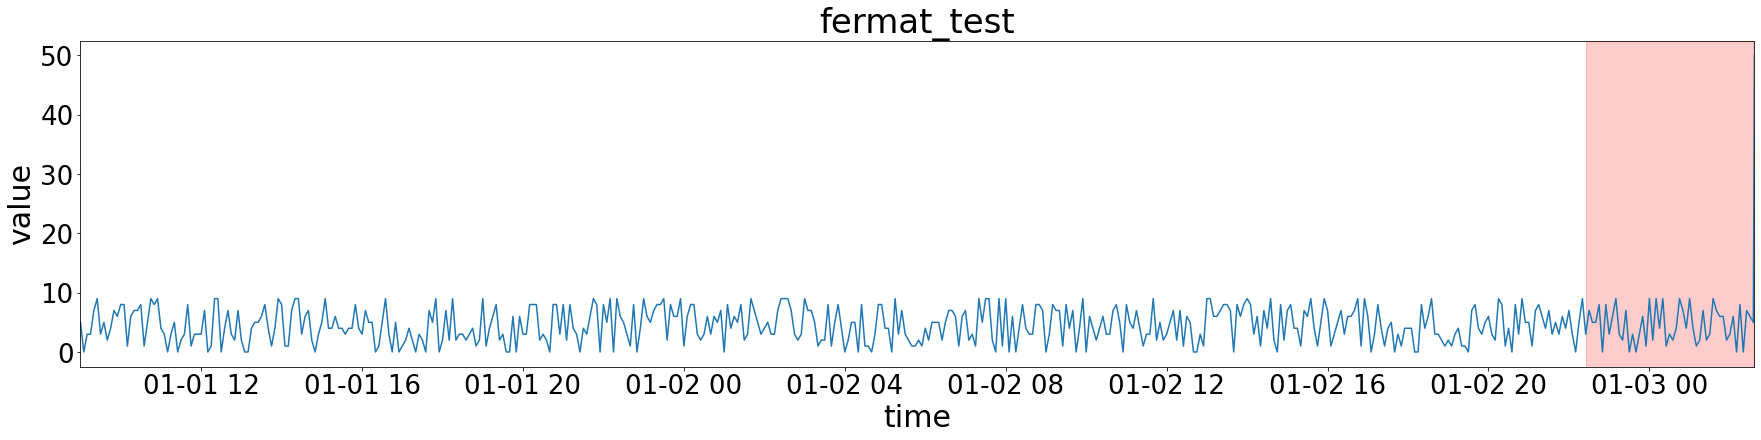

In [9]:
plot(custom_data, anomalies)